In [546]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

In [547]:
df = pd.read_csv('SAADAA_assessment_data - Sheet1.csv')
df.head()

,customer_id,customer_tenure,customer_location,customer_type,order_id,order_date,order_value,payment_method,order_frequency,discount_applied,return_status,product_category,product_sku,size,inventory_status,source,engagement_score
0,CUST00001,39,Delhi,Returning,ORD000001,08/12/2023,4015.21,Net Banking,9,5,No,Jackets,SKU0001,XXL,In Stock,Word of Mouth,36
1,CUST00002,52,Hyderabad,Returning,ORD000002,06/09/2023,2205.61,Credit Card,3,15,No,T-Shirts,SKU0002,S,Out of Stock,Google Ads,37
2,CUST00003,29,Pune,Returning,ORD000003,01/05/2023,858.84,Net Banking,8,30,No,T-Shirts,SKU0003,L,In Stock,Email Marketing,95
3,CUST00004,15,Jaipur,Returning,ORD000004,02/03/2023,500.00,UPI,1,0,No,T-Shirts,SKU0004,XXL,In Stock,Word of Mouth,10
4,CUST00005,43,Pune,Returning,ORD000005,11/04/2023,1843.50,Wallet,9,40,Yes,Sweatshirts,SKU0005,L,In Stock,Word of Mouth,0


In [548]:
df.columns

Index(['customer_id', 'customer_tenure', 'customer_location', 'customer_type',
       'order_id', 'order_date', 'order_value', 'payment_method',
       'order_frequency', 'discount_applied', 'return_status',
       'product_category', 'product_sku', 'size', 'inventory_status', 'source',
       'engagement_score'],
      dtype='object')

In [549]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        1000 non-null   object 
 1   customer_tenure    1000 non-null   int64  
 2   customer_location  1000 non-null   object 
 3   customer_type      1000 non-null   object 
 4   order_id           1000 non-null   object 
 5   order_date         1000 non-null   object 
 6   order_value        1000 non-null   float64
 7   payment_method     1000 non-null   object 
 8   order_frequency    1000 non-null   int64  
 9   discount_applied   1000 non-null   int64  
 10  return_status      1000 non-null   object 
 11  product_category   1000 non-null   object 
 12  product_sku        1000 non-null   object 
 13  size               1000 non-null   object 
 14  inventory_status   1000 non-null   object 
 15  source             1000 non-null   object 
 16  engagement_score   1000 n

# Data Understanding And Exploration

### Checking For NULL Values

In [550]:
df.isnull().sum()

customer_id          0
customer_tenure      0
customer_location    0
customer_type        0
order_id             0
order_date           0
order_value          0
payment_method       0
order_frequency      0
discount_applied     0
return_status        0
product_category     0
product_sku          0
size                 0
inventory_status     0
source               0
engagement_score     0
dtype: int64

In [551]:
df[df.isnull().any(axis=1)]

,customer_id,customer_tenure,customer_location,customer_type,order_id,order_date,order_value,payment_method,order_frequency,discount_applied,return_status,product_category,product_sku,size,inventory_status,source,engagement_score


In [552]:
### Check for Duplicates
df.duplicated().sum()

0

In [553]:
## Summery Statistics
df.describe()

,customer_tenure,order_value,order_frequency,discount_applied,engagement_score
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,31.200000,2600.555060,5.032000,14.72000,50.435000
std,17.372905,1394.337968,2.551762,14.22758,28.985582
min,1.000000,500.000000,1.000000,0.00000,0.000000
25%,17.000000,1565.915000,3.000000,0.00000,26.000000
50%,32.000000,2541.280000,5.000000,15.00000,51.000000
75%,47.000000,3541.415000,7.000000,25.00000,76.000000
max,60.000000,7251.060000,9.000000,50.00000,100.000000


In [554]:
## Checking For unique Values in Categorical Column 
df.nunique()

customer_id          1000
customer_tenure        60
customer_location       8
customer_type           2
order_id             1000
order_date            365
order_value           913
payment_method          5
order_frequency         9
discount_applied        9
return_status           2
product_category        6
product_sku          1000
size                    5
inventory_status        2
source                  5
engagement_score      101
dtype: int64

In [555]:
df.head(2)

,customer_id,customer_tenure,customer_location,customer_type,order_id,order_date,order_value,payment_method,order_frequency,discount_applied,return_status,product_category,product_sku,size,inventory_status,source,engagement_score
0,CUST00001,39,Delhi,Returning,ORD000001,08/12/2023,4015.21,Net Banking,9,5,No,Jackets,SKU0001,XXL,In Stock,Word of Mouth,36
1,CUST00002,52,Hyderabad,Returning,ORD000002,06/09/2023,2205.61,Credit Card,3,15,No,T-Shirts,SKU0002,S,Out of Stock,Google Ads,37


In [556]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)

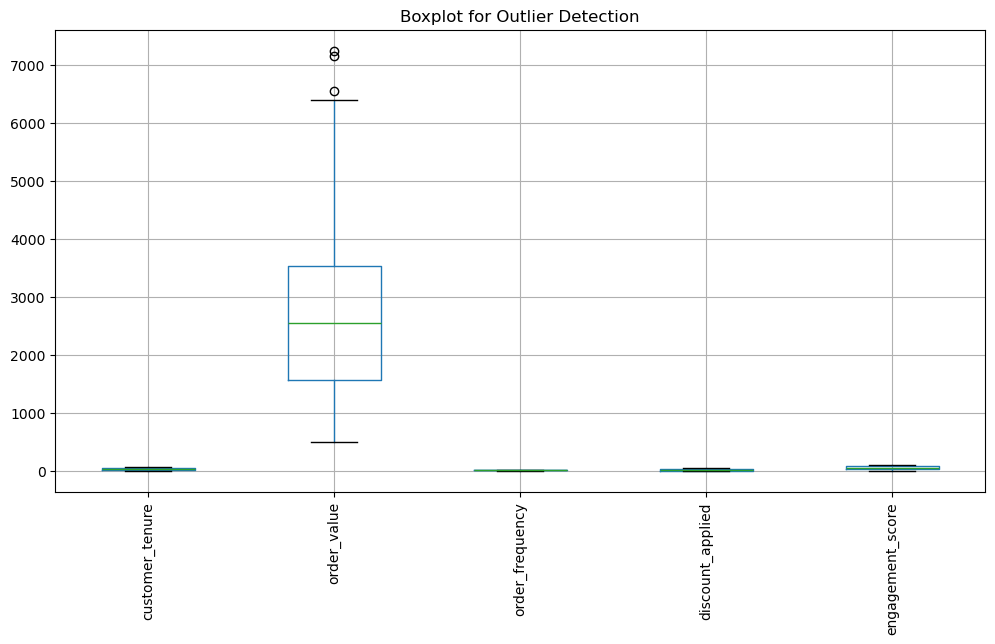

In [557]:
## Outliers 
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
numeric_cols = df.select_dtypes(include=['number']).columns

# Plot boxplots
plt.figure(figsize=(12,6))
df[numeric_cols].boxplot(rot=90)  # Rotate x-axis labels for readability
plt.title("Boxplot for Outlier Detection")
plt.show()

In [558]:
#Identifying the outliers
# calculate the quartiles
q25, q50, q75 = np.percentile(df['order_value'], [25, 50, 75])

iqr = q75 - q25

# calculate the min and max
min_order = q25 - 1.5*iqr
max_order = q75 + 1.5*iqr

# show calculations
min_order, q25, q50, q75, max_order

(-1397.335, 1565.915, 2541.2799999999997, 3541.415, 6504.665)

In [559]:
# Since minimum order value  is negative we can ignore it
# finding the details of the order values > max_order_value
df[df.order_value > 6504.665]

,customer_id,customer_tenure,customer_location,customer_type,order_id,order_date,order_value,payment_method,order_frequency,discount_applied,return_status,product_category,product_sku,size,inventory_status,source,engagement_score
43,CUST00044,47,Kolkata,Returning,ORD000044,2023-01-28,7251.06,UPI,6,0,Yes,Sweatshirts,SKU0044,L,In Stock,Email Marketing,92
212,CUST00213,28,Hyderabad,Returning,ORD000213,2023-08-10,7157.30,Net Banking,9,5,No,Jackets,SKU0213,XXL,In Stock,Google Ads,5
537,CUST00538,33,Mumbai,Returning,ORD000538,2023-11-14,6549.57,Net Banking,5,25,No,T-Shirts,SKU0538,S,In Stock,Google Ads,65


In [560]:
import sqlite3
import pandas as pd

# Create SQLite database in memory
conn = sqlite3.connect(":memory:")
df.to_sql("orders_table", conn, index=False, if_exists="replace")  # Load data into SQL

# Run SQL query to get top 3 order values
query = "SELECT * FROM orders_table ORDER BY order_value DESC LIMIT 3"
top_orders = pd.read_sql(query, conn)

# Display result
print(top_orders)

# Close connection
conn.close()

  customer_id  customer_tenure customer_location customer_type   order_id  \
0   CUST00044               47           Kolkata     Returning  ORD000044   
1   CUST00213               28         Hyderabad     Returning  ORD000213   
2   CUST00538               33            Mumbai     Returning  ORD000538   

            order_date  order_value payment_method  order_frequency  \
0  2023-01-28 00:00:00      7251.06            UPI                6   
1  2023-08-10 00:00:00      7157.30    Net Banking                9   
2  2023-11-14 00:00:00      6549.57    Net Banking                5   

   discount_applied return_status product_category product_sku size  \
0                 0           Yes      Sweatshirts     SKU0044    L   
1                 5            No          Jackets     SKU0213  XXL   
2                25            No         T-Shirts     SKU0538    S   

  inventory_status           source  engagement_score  
0         In Stock  Email Marketing                92  
1        

#### Insights - From the above sql code we can confirm the top order_values came from the customer_type returning

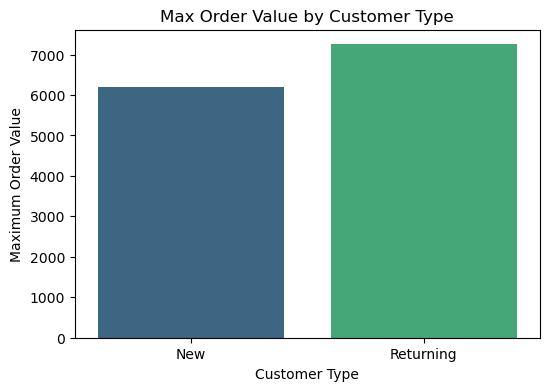

In [561]:
import pandas as pd

avg_order_value = df.groupby("customer_type")["order_value"].max().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x="customer_type", y="order_value", data=avg_order_value, palette="viridis",  hue='customer_type')

plt.title("Max Order Value by Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Maximum Order Value")
plt.show()

### Data Visualization

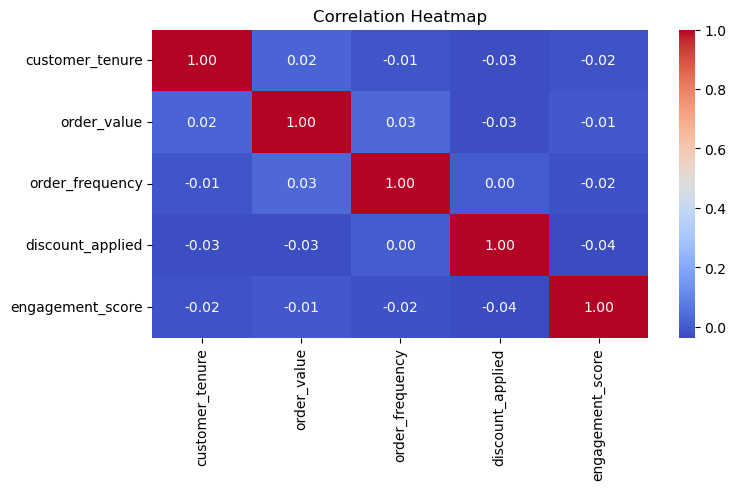

In [562]:
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=["number"])

plt.figure(figsize=(8, 4))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Heatmap")
plt.show()


## Insights

1. Overall Low correlation -
    * Most of the variables have very low correlation values.
    * There is No strong positive or negative correlations.

2. Order Value & Order Frequency (0.03) - there is a very Weak positive correlation found between Order value And Order Frequency. this could mean high order values may not have high order frequency.

3. Discount Applied & Engagement Score (-0.04) - there is a weak negative correlation between the discount applied and Engagement score, customers with Higher discount has lower engagement score hence we can say discount is not necessary for higher engagement.

4. Customer Tenure & Order Value (0.02) - there is almost no correlation between customer tenure and order value, hence we can say how much a customer spends does not depends on their lotalty period

**Business Insights:**
  * customer engagement score might be influenced by other factors such as product quality, Services etc than order_value
  * Discounts do not have any direct impact on customer engagement so other engagement strategies can be applied.
  * Since customer tenure has very mild correlation with order_value therefore we can say old and new customers spend almost similarly per order, therefore other customer retension strategies should be introduced along with tenure 


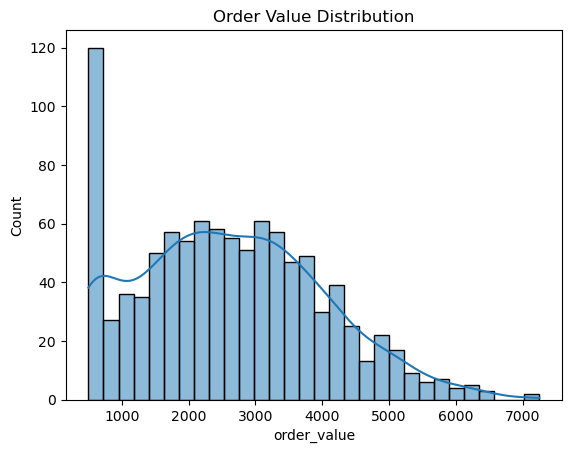

In [563]:
# Distribution of order_value
sns.histplot(df['order_value'], kde=True, bins=30)
plt.title("Order Value Distribution")
plt.show()

## Insights
1. Significant peak at low order Values (~1000)- This implies that most of the customers are makeing small purchases this could be due price-sensitivity in the Targeted Group
2. Right skewed distribution -
    * The majority of orders are below 5000, with very few orders above this threshold.
    * A small number of customers place high-value orders.
4. Steady Decline in Frequency as Order value Increases - As order value increases beyond 3000, the frequency of orders drops.This suggests that higher-value purchases are less common but still occur.

## Recomendations
1. Consider offering bundle deals or incentives for customers to increase their order value.
2. Identify the type of these high-value customers  and include them in the Targeted group with loyalty programs, premium services, or exclusive offers.
3. Understand why lower-value customers don’t spend more—are there barriers like pricing, trust, or product availability?
4. Offer personalized upselling strategies to encourage mid-value customers to move into higher spending brackets.
5. Provide financing or EMI options for high-ticket items to make large purchases more accessible.

In [564]:
df.head(2)

,customer_id,customer_tenure,customer_location,customer_type,order_id,order_date,order_value,payment_method,order_frequency,discount_applied,return_status,product_category,product_sku,size,inventory_status,source,engagement_score
0,CUST00001,39,Delhi,Returning,ORD000001,2023-12-08,4015.21,Net Banking,9,5,No,Jackets,SKU0001,XXL,In Stock,Word of Mouth,36
1,CUST00002,52,Hyderabad,Returning,ORD000002,2023-09-06,2205.61,Credit Card,3,15,No,T-Shirts,SKU0002,S,Out of Stock,Google Ads,37


#### Visualising The Relationship Between Customer_Type And order Value

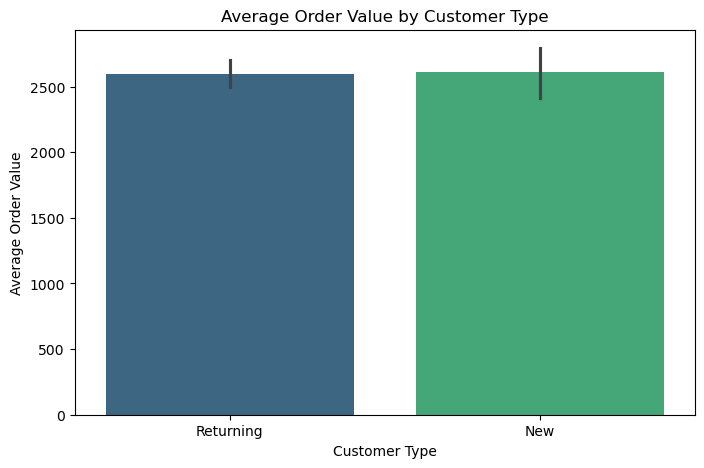

In [565]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(x="customer_type", y="order_value", hue='customer_type',data=df, estimator=np.mean, palette="viridis")

plt.title("Average Order Value by Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Average Order Value")
plt.show()

## Insights 
1. Similar Order Value for Both Customer Types - new customers are spending just as much as returning customers on average.
2. Variation in New Customers' Order Value -
   * The error bar (black line on top of the bar) for New customers is slightly larger than that of Returning customers.
   * This indicates greater variability in order values for New customers, meaning some may spend significantly more or less.

### Business Insights
If new customers are already spending as much as returning ones, marketing efforts could focus on customer retention to ensure they keep coming back.


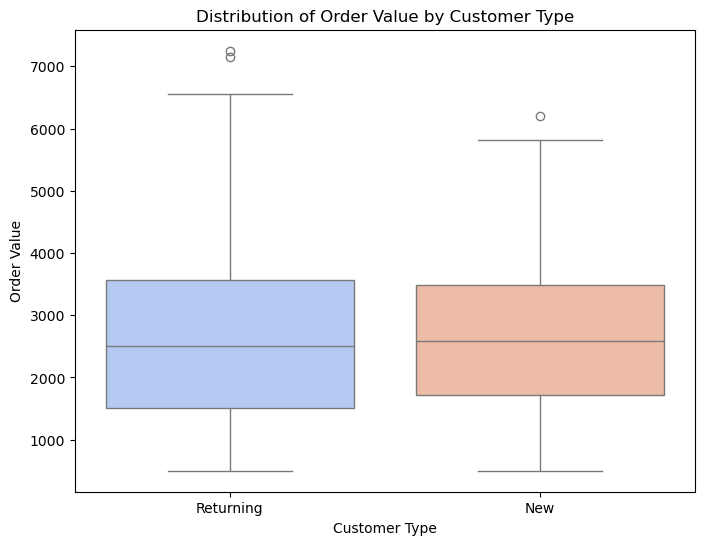

In [566]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(8, 6))

# Create the box plot
sns.boxplot(x="customer_type", y="order_value",hue="customer_type", data=df, palette="coolwarm")

# Add title and labels
plt.title("Distribution of Order Value by Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Order Value")

# Show the plot
plt.show()

### Outliers:

* Both customer types have high-value outliers (above 6000+), meaning a small percentage of customers place significantly large orders.
* The Returning customers seem to have more extreme high-value orders compared to new customers, suggesting that loyal customers might make occasional large purchases.

### Overall Distribution:

* The order value range is wider for returning customers, implying they have more fluctuations in spending behavior.
* New customers have a more consistent spending pattern, but they also have a few large-order outliers.
  
### Business Implications
* Returning customers occasionally make very large purchases, so loyalty programs or exclusive offers could encourage repeat purchases.
* New customers may need targeted promotions or first-time buyer discounts to incentivize higher spending.
* Since both groups have similar medians, marketing strategies should focus on customer retention and increasing order frequency rather than just order value.

#### Statistical Analysis

In [567]:
### Check Whether Customer Type  has any difference on Order Value
import scipy.stats as stats
import pandas as pd

# Example: Testing if 'order_value' significantly differs across 'customer_type'
grouped_data = [df[df["customer_type"] == category]["order_value"] for category in df["customer_type"].unique()]

# Apply Kruskal-Wallis test
stat, p_value = stats.kruskal(*grouped_data)

# Print results
print(f"Kruskal-Wallis Test Statistic: {stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in order values across customer types.")
else:
    print("No significant difference in order values across customer types.")

Kruskal-Wallis Test Statistic: 0.019408665869337552
P-value: 0.889201246699644
No significant difference in order values across customer types.


## Visualizing Relationship between customer TYpe and Payment Method

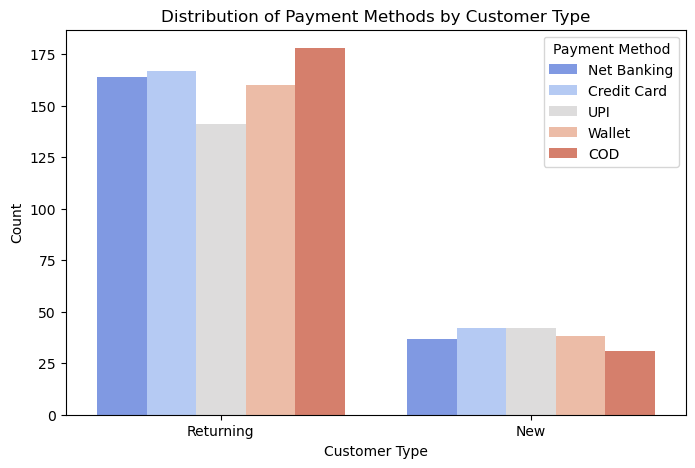

In [568]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="customer_type", hue="payment_method", palette="coolwarm")
plt.title("Distribution of Payment Methods by Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Count")
plt.legend(title="Payment Method")
plt.show()

## Insights 
1. Returning Customers Prefer All Payment Methods- Cash on Delivery (COD) is the most preferred payment method, followed by Net Banking and Credit Card.
2. New Customers Use UPI  and Credit Card as the most favoured transaction.
3. Fewer new customers are making purchases or that returning customers are more engaged.
4. COD is the Most Popular Payment Method- Among returning customers, COD has the highest count, which may suggest that they are comfortable making repeat purchases with this method.


### Statistical Validation

In [569]:
import scipy.stats as stats
import pandas as pd

# Example: Testing if 'order_value' significantly differs across 'customer_type'
grouped_data = [df[df["customer_type"] == category]["payment_method"] for category in df["customer_type"].unique()]

# Apply Kruskal-Wallis test
stat, p_value = stats.kruskal(*grouped_data)

# Print results
print(f"Kruskal-Wallis Test Statistic: {stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in payment method  across customer types.")
else:
    print("No significant difference in order payment method customer types.")

Kruskal-Wallis Test Statistic: 1.7700798876624873
P-value: 0.18337219262029708
No significant difference in order payment method customer types.


### Visualizing relationship between customer_type and engagement score

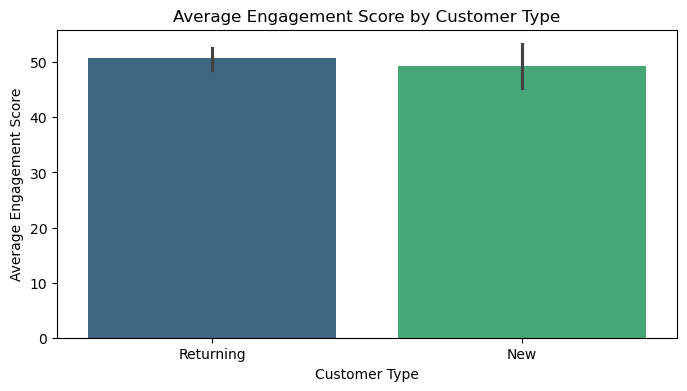

In [570]:
plt.figure(figsize=(8, 4))
sns.barplot(x="customer_type", y="engagement_score", data=df, estimator=np.mean, hue='customer_type',palette="viridis")

plt.title("Average Engagement Score by Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Average Engagement Score")
plt.show()

### Insights 
1. Similar Engagement Scores:
    * Both Returning and New customers have nearly identical average engagement scores, around 50.
    * This suggests that new customers are as engaged as returning customers, indicating strong initial interactions.
2. Slightly Higher Score for Returning Customers: Returning customers have a marginally higher engagement score, which is expected as they have already interacted with the business before.
3. Standard Deviation & Variation: The error bars indicate some variation in engagement scores, especially for new customers, which could mean different levels of interaction across customer segments.

### Recomendations
* If new customers are engaged well, focus on retention strategies to convert them into repeat buyers.
* If engagement among returning customers isn't significantly higher, consider loyalty programs or personalized offers to increase engagement.

#### Statistical Validation

In [571]:
import scipy.stats as stats

# Group engagement_score by customer_type
groups = [df[df["customer_type"] == cat]["engagement_score"] for cat in df["customer_type"].unique()]

# Perform Kruskal-Wallis test
stat, p = stats.kruskal(*groups)

# Print the results
print(f"Kruskal-Wallis Test Statistic: {stat:.4f}")
print(f"P-value: {p:.4f}")

# Interpretation
if p < 0.05:
    print("There is a significant difference in engagement score between customer types.")
else:
    print("No significant difference in engagement score between customer types.")

Kruskal-Wallis Test Statistic: 0.3531
P-value: 0.5524
No significant difference in engagement score between customer types.


#### Visualizing The Relation Between Payment Method And Engagaement score

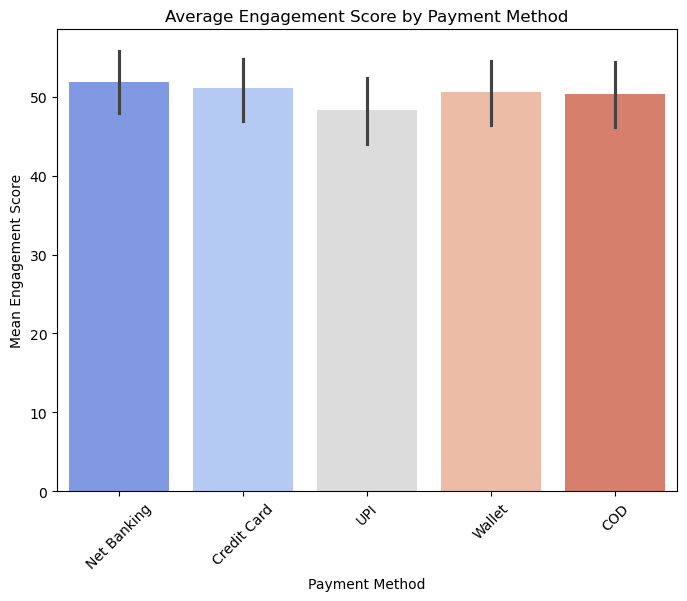

In [572]:
plt.figure(figsize=(8,6))
sns.barplot(x="payment_method", y="engagement_score", data=df, estimator=np.mean,hue="payment_method", palette="coolwarm")
plt.title("Average Engagement Score by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Mean Engagement Score")
plt.xticks(rotation=45)
plt.show()

## Insights
1. Net Banking & Credit Card have the highest engagement scores- users paying online (rather than cash) might be more engaged with the platform.
2. UPI has the lowest engagement score - customers using UPI might be more transactional and less loyal compared to those using Net Banking or Credit Cards.
3. Wallet & COD have similar engagement levels - COD customers, despite paying on delivery, engage with the platform just as much as Wallet users.
4. Overall Variation is Minimal - There is no drastic difference in engagement scores across payment methods.
However, slight variations suggest that online payment users (Net Banking & Credit Card) may have a stronger connection with the platform.


## Business Recommendations:
* Encourage UPI users to engage more . for example, offering loyalty rewards for repeat purchases).
* Promote Credit Card & Net Banking payments through cashback or exclusive discounts since these users tend to be more engaged.
* Analyze COD users further to see if they can be converted into prepaid customers for better engagement.

#### Statistical Validation

In [573]:
import scipy.stats as stats

# Group engagement_score by payment_method
groups = [df[df["payment_method"] == method]["engagement_score"] for method in df["payment_method"].unique()]

# Perform Kruskal-Wallis test
stat, p = stats.kruskal(*groups)

# Print the results
print(f"Kruskal-Wallis Test Statistic: {stat:.4f}")
print(f"P-value: {p:.4f}")

# Interpretation
if p < 0.05:
    print("There is a significant difference in engagement score between payment methods.")
else:
    print("No significant difference in engagement score between payment methods.")

Kruskal-Wallis Test Statistic: 1.5444
P-value: 0.8187
No significant difference in engagement score between payment methods.


# Customer Behavior Analysis

In [574]:
## database creation using SQLite
connection = sqlite3.connect(":memory:")  # Creates a temporary in-memory database
df.to_sql("customer_data", connection, index=False, if_exists="replace")  # Save in SQL

1000

In [575]:
df.head(2)

,customer_id,customer_tenure,customer_location,customer_type,order_id,order_date,order_value,payment_method,order_frequency,discount_applied,return_status,product_category,product_sku,size,inventory_status,source,engagement_score
0,CUST00001,39,Delhi,Returning,ORD000001,2023-12-08,4015.21,Net Banking,9,5,No,Jackets,SKU0001,XXL,In Stock,Word of Mouth,36
1,CUST00002,52,Hyderabad,Returning,ORD000002,2023-09-06,2205.61,Credit Card,3,15,No,T-Shirts,SKU0002,S,Out of Stock,Google Ads,37


## Customer Segmentation Based on - 
1. Purchase Frequency - Number of orders per customer
2. Average Order Value (AOV)
3. Total Spend

In [576]:
# finding Average Order Frequency
print('Average Order Frequency',df['order_frequency'].mean())
print('Maximu Order Frequency',df['order_frequency'].max())
print('Minimum Order Frequency',df['order_frequency'].min())

Average Order Frequency 5.032
Maximu Order Frequency 9
Minimum Order Frequency 1


In [577]:
Query = """
SELECT customer_id, 
       customer_type,
       AVG(order_value) AS avg_spent,
       SUM(order_value) As total_sepent,
       CASE
           WHEN order_frequency <= 3 THEN 'Low' 
           WHEN order_frequency BETWEEN 4 AND 7 THEN 'Medium'
           ELSE 'High'
       END AS purchase_segment
FROM customer_data
GROUP BY customer_id, customer_type, purchase_segment;
"""
purch_freq_df = pd.read_sql(Query, connection)
purch_freq_df.head()

,customer_id,customer_type,avg_spent,total_sepent,purchase_segment
0,CUST00001,Returning,4015.21,4015.21,High
1,CUST00002,Returning,2205.61,2205.61,Low
2,CUST00003,Returning,858.84,858.84,High
3,CUST00004,Returning,500.00,500.00,Low
4,CUST00005,Returning,1843.50,1843.50,High


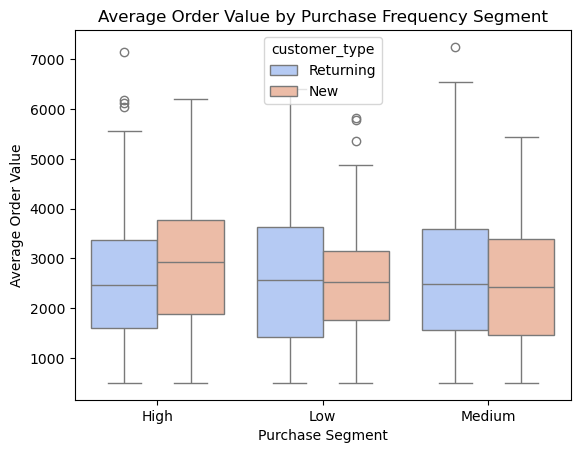

In [578]:
sns.boxplot(data=purch_freq_df, x="purchase_segment", y="avg_spent", hue="customer_type", palette="coolwarm")
plt.title("Average Order Value by Purchase Frequency Segment")
plt.xlabel("Purchase Segment")
plt.ylabel("Average Order Value")
plt.show()

## Insights
1. **Spending Difference Accross Segments -**
    * customers who buy freuently i.e higher purchase segment have a wide range of order values, some spend more while others spend significantly less.
    *  Returning customers have steadier spending habits compared to new customers.
2. **customer expandature in different purchase segments -**
    * New Customers in the high purchase segment spend more on average this is possibly due to first big time purchase.
    * In the Medium and Low purchase groups, returning customers spend slightly more than new customers, showing they trust the business and keep coming back.
3. **Outliers-** Some customers spend much more than the rest, especially in the High and Medium purchase segments

## Recomendations
* Offer special deals or discounts to encourage them to keep shopping.
* Retain High-Spending New Customers with welcome offers or follow-up deals.
* Identify and offer exclusive benefits to customers who make very high purchases.

# Customer Retention Trends 

  customer_id  customer_tenure  total_spend
0   CUST00001               39      4015.21
1   CUST00002               52      2205.61
2   CUST00003               29       858.84
3   CUST00004               15       500.00
4   CUST00005               43      1843.50


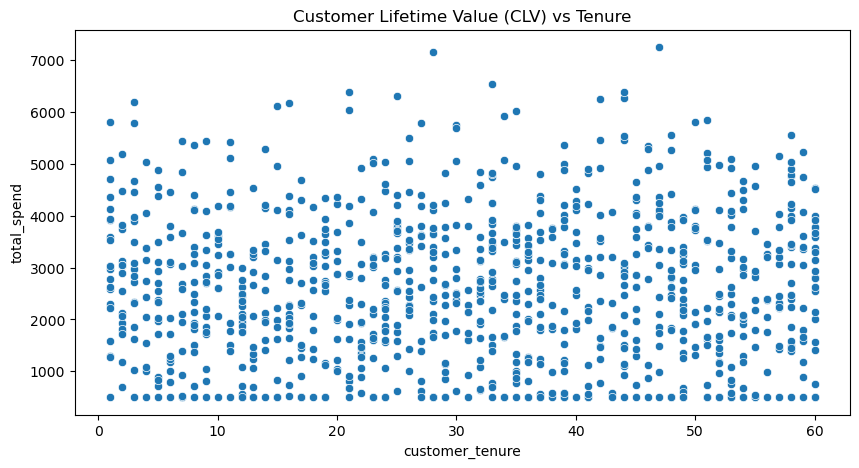

In [579]:
query2 = """
SELECT 
    customer_id,
    customer_tenure,
    SUM(order_value) AS total_spend
FROM customer_data
GROUP BY customer_id;
"""
clv_df = pd.read_sql(query2, connection)
print(clv_df.head())
plt.figure(figsize=(10,5))
sns.scatterplot(x='customer_tenure', y='total_spend', data=clv_df)
plt.title("Customer Lifetime Value (CLV) vs Tenure")
plt.show()

## Insights
1. No clear Trend Between Tenure And ToTal spend -
    * The points are widely spread as such that longer tenure is not resulting in higher spending.
    * Customer With shorter and longer tenure is having similar spending patterns.
2. Some Customers With short tenure have high total spend above 6000 but this occurs rarely.
3. some long term customers sends quite low.
4. Porential Customer Segments -
   * High-spend, short-tenure customers: These could be new, valuable customers who might turn into loyal customers.
   *  Low-spend, long-tenure customers: These might need re-engagement strategies to increase their order value.
   *  Consistent mid-range spenders: These customers likely make regular purchases but do not spend excessively.
## Business Recomendations - 
* Identify and target high-spending short-tenure customers to increase retention.
* Offer promotions or loyalty programs to low-spending, long-tenure customers to boost their spending.
* Perform deeper segmentation to understand purchase frequency patterns.

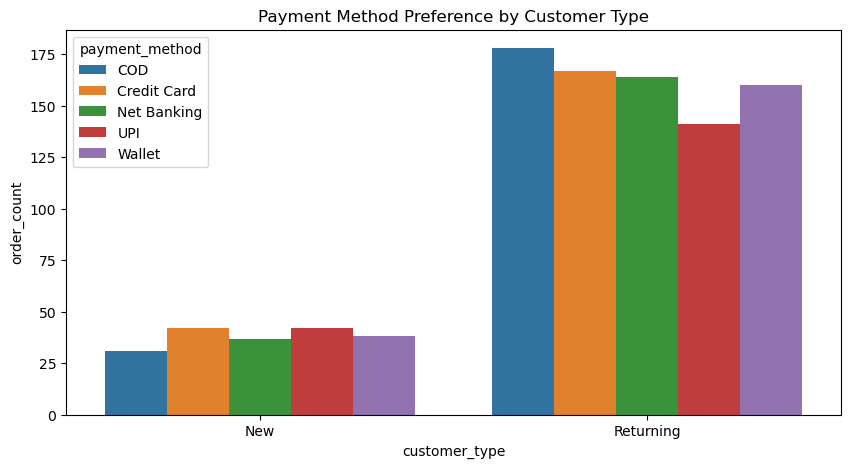

In [580]:
## Payment Method Analysis
query3 = """
SELECT 
    customer_type,
    payment_method,
    COUNT(order_id) AS order_count,
    AVG(order_value) AS avg_order_value
FROM customer_data
GROUP BY customer_type, payment_method;
"""
pay_df = pd.read_sql(query3, connection)
plt.figure(figsize=(10,5))
sns.barplot(x='customer_type', y='order_count', hue='payment_method', data=pay_df)
plt.title("Payment Method Preference by Customer Type")
plt.show()

## Insights
1. Returning customers make significantly more purchases than new customers across all payment methods.
2. COD (Cash on Delivery) is the most preferred method among returning customers.
3. Credit Cards and Net Banking are also widely used, indicating a preference for digital transactions.
4. New customers have lower order counts, with a relatively even distribution across payment methods.
5. Wallet and UPI usage are slightly lower than other digital methods among returning customers.

## Recomendations
1. Promote Digital Payments with discounts or cashback.
2. Offer First-Time Buyer Deals to encourage prepaid methods.
3. Loyalty Rewards for returning customers using digital payments.
4. Target COD Users with faster delivery or exclusive offers.
5. Enhance UPI & Wallet Experience for smoother transactions.

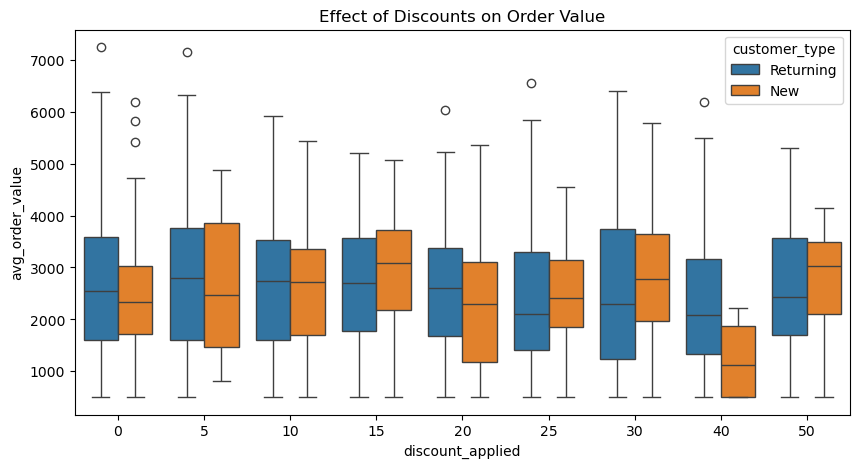

In [581]:
# Impact Of Discount on Spending And Retaintion 
query = """
SELECT 
    customer_id, 
    customer_type,
    discount_applied,
    AVG(order_value) AS avg_order_value
FROM customer_data
GROUP BY customer_id, customer_type, discount_applied;
"""
discount_df = pd.read_sql(query, connection)
plt.figure(figsize=(10,5))
sns.boxplot(x='discount_applied', y='avg_order_value', hue='customer_type', data=discount_df)
plt.title("Effect of Discounts on Order Value")
plt.show()

## Insights
1. Returning customers generally have a higher average order value (AOV) than new customers across discount levels.
2. New customers show lower AOV, but their spending increases slightly as discounts increase.
3. Discounts don't always lead to a significant increase in AOV, suggesting other factors influence spending.
4. Some outliers indicate that a few customers make high-value purchases regardless of discounts.
## Business Recommendations
* Targeted Discounts: Provide personalized discounts for returning customers to increase loyalty but limit overuse.
* Incentivize Higher AOV: Offer discounts for bulk purchases or higher cart values.
* Strategic First Purchase Discounts: Encourage new customers with discounts but ensure profitability.
* Analyze Discount ROI: Track if discounts are leading to repeat purchases or just one-time buyers.

# Sales Performance Analysis

  product_sku  total_sales
0     SKU0044      7251.06
1     SKU0213      7157.30
2     SKU0538      6549.57
3     SKU0007      6396.56
4     SKU0215      6390.36
5     SKU0379      6319.07
6     SKU0129      6273.32
7     SKU0039      6252.55
8     SKU0462      6198.60
9     SKU0361      6183.66


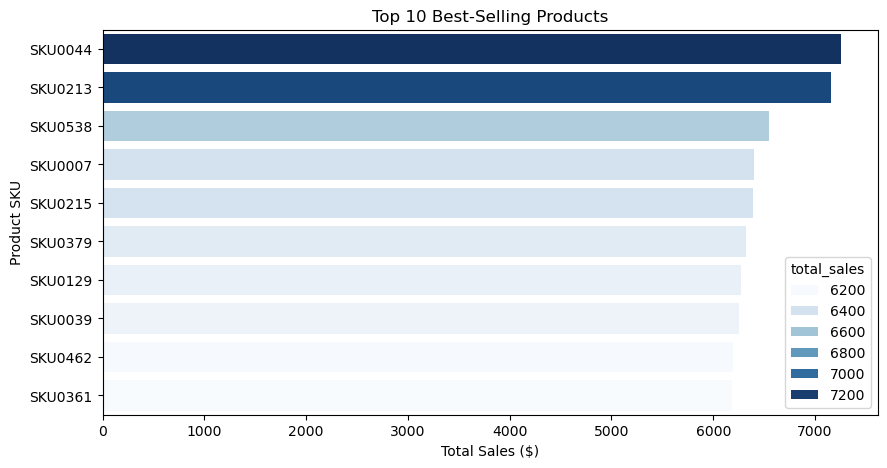

In [582]:
### Top Performing Products and Categories
query4= """
SELECT product_sku, SUM(order_value) AS total_sales
FROM customer_data
GROUP BY product_sku
ORDER BY total_sales DESC
LIMIT 10;
"""
top = pd.read_sql(query4,connection)
print(top)

plt.figure(figsize=(10,5))
sns.barplot(x="total_sales", y="product_sku", data=top,hue="total_sales" ,palette="Blues")
plt.xlabel("Total Sales ($)")
plt.ylabel("Product SKU")
plt.title("Top 10 Best-Selling Products")
plt.show()

## Insights
1. Top-Selling Products:
    * SKU0044(Sweatshirts) and SKU0213(Jackets) are the highest revenue-generating products, both nearing $7,200 in total sales.
    * These two significantly outperform other products in the top 10 list.
2. Sales Distribution:
    * The difference between the top products and lower-ranking ones is not huge, indicating a relatively even sales distribution among the best-sellers.
    * The lowest-ranked product (SKU0361) still generates over $6,200, meaning all top products contribute strongly to revenue.
 ## Recomendations
1. Ensure high availability for SKU0044 and SKU0213 to prevent stockouts.
2. Consider cross-selling or bundling these best-sellers with slower-moving items.
3. Analyze pricing strategies for the top products—adjusting pricing or discounts could further boost sales.

### Top Categoris By Sales 

  product_category  total_sales
0          Jackets    487692.11
1           Shirts    443247.27
2            Jeans    431396.90
3         T-Shirts    429779.54
4          Dresses    407475.19
5      Sweatshirts    400964.05


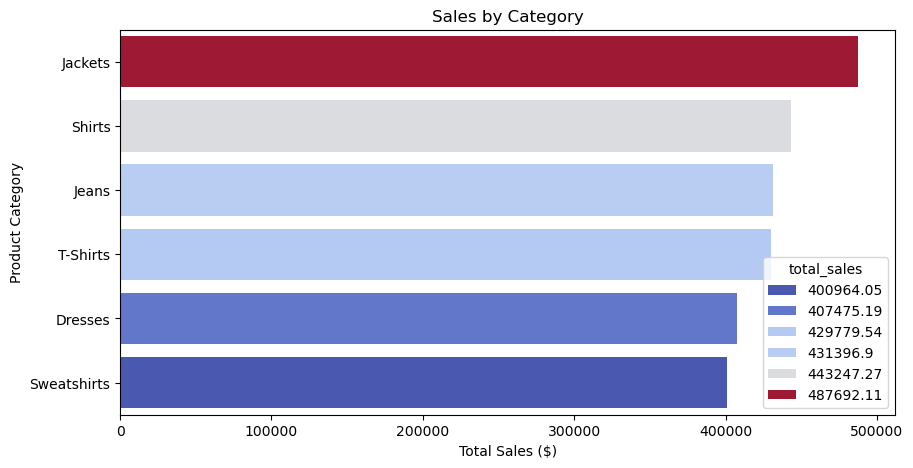

In [583]:
query = """
SELECT product_category, SUM(order_value) AS total_sales
FROM customer_data
GROUP BY product_category
ORDER BY total_sales DESC;
"""
top_categories = pd.read_sql(query, connection)
print(top_categories)

plt.figure(figsize=(10,5))
sns.barplot(x="total_sales", y="product_category", data=top_categories,hue="total_sales", palette="coolwarm")
plt.xlabel("Total Sales ($)")
plt.ylabel("Product Category")
plt.title("Sales by Category")
plt.show()

## Insights - 
1.  Jackets Lead Sales
    * Jackets generate the highest revenue (~$487,692), making them the top-performing category.
    * This could indicate a high demand for outerwear, possibly due to seasonal trends or premium pricing.
      
2.  Steady Performance Across Categories
    * Shirts, Jeans, and T-Shirts have similar sales figures (~$400,000 - $430,000).
    * This suggests that these categories are consistently popular among customers.
      
3. Dresses and Sweatshirts Are Competitive
    * Dresses and Sweatshirts have sales above $430,000, slightly outperforming Jeans and T-Shirts.
    * Sweatshirts performing well might indicate a preference for comfortable or casual wear.
      
4. Potential Seasonal Impact
* High sales in Jackets and Sweatshirts suggest colder weather trends or a strong winter collection.
* Further analysis of monthly sales trends could confirm if sales peak during colder months.
## Recomendations
* Since Jackets are leading, maintaining inventory and focusing on seasonal promotions could boost revenue further.
* Lower-performing categories (if any) should be analyzed for possible improvement in marketing, pricing, or product variety.

### Monthly Sales Trends & Sudden Spikes

            order_date  daily_sales
0  2023-10-04 00:00:00     15788.36
1  2023-06-23 00:00:00     14897.34
2  2023-08-26 00:00:00     14536.18
3  2023-02-12 00:00:00     13448.02
4  2023-05-28 00:00:00     13012.25
5  2023-08-05 00:00:00     12398.96
6  2023-06-20 00:00:00     12349.96
7  2023-07-25 00:00:00     12131.83
8  2023-04-14 00:00:00     11959.91
9  2023-03-01 00:00:00     11822.56


C:\Users\ASUS\AppData\Local\Temp\ipykernel_22448\1431379457.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_date", y="daily_sales", data=spike_days, palette="Reds_r")


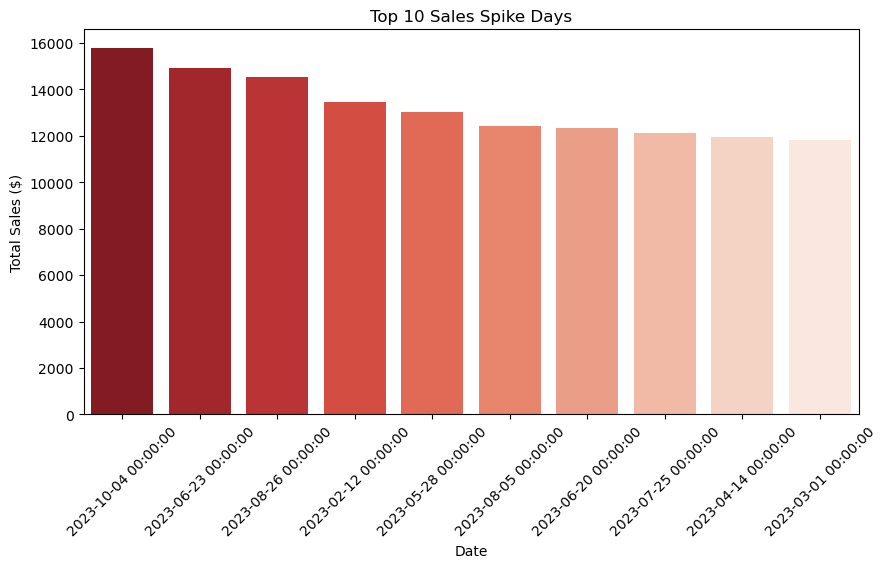

In [584]:
query5 = """
SELECT order_date, SUM(order_value) AS daily_sales
FROM customer_data
GROUP BY order_date
ORDER BY daily_sales DESC
LIMIT 10;
"""
spike_days = pd.read_sql(query5, connection)
print(spike_days)

plt.figure(figsize=(10,5))
sns.barplot(x="order_date", y="daily_sales", data=spike_days, palette="Reds_r")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Total Sales ($)")
plt.title("Top 10 Sales Spike Days")
plt.show()

## Insights
1. October 4, 2023, Had the Highest Sales
    * This date saw the biggest spike in sales, surpassing $16,000.
    * Possible reasons: a promotional event, seasonal demand, or a bulk purchase by customers.
      
2. Multiple High-Spike Days Across the Year - Sales spikes occurred across different months-
    * June 23 & August 26 also had strong performances (~$14,500).
    * February 12, May 28, and August 5 had slightly lower but still high sales.
3️⃣ Seasonal or Promotional Impact?

    * Spikes in june 23 could be due to holidays such as Eid.
    * spikes in Aug 26 could be due to janmastami around the corner


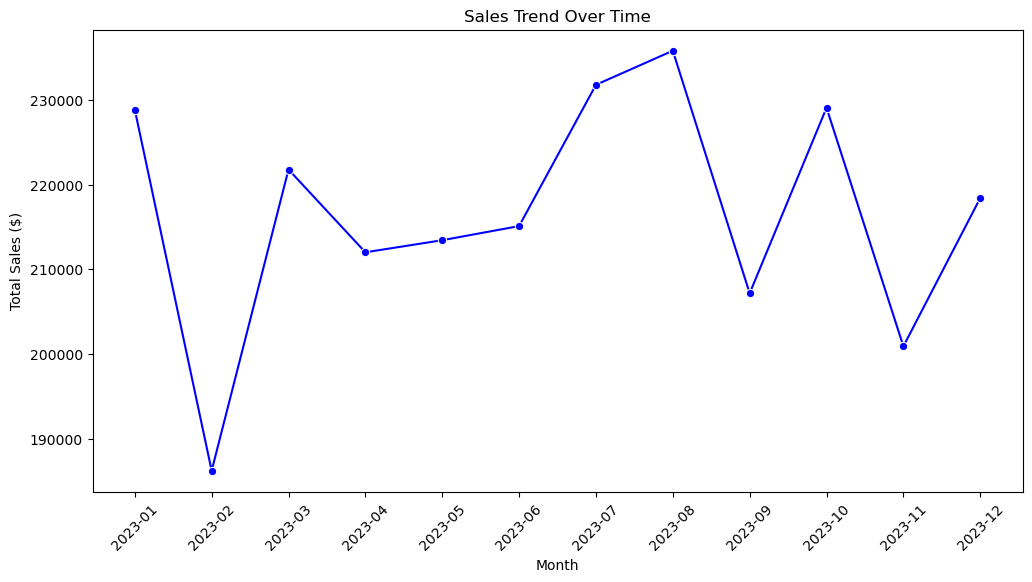

In [585]:
query6="""
SELECT STRFTIME('%Y-%m', order_date) AS order_month,
       SUM(order_value) AS Monthly_sales
FROM customer_data
GROUP BY order_month
ORDER BY order_Month;
"""
monthly_sales=pd.read_sql(query6, connection)
monthly_sales

plt.figure(figsize=(12,6))
sns.lineplot(x="order_month", y="Monthly_sales", data=monthly_sales, marker="o", color="blue")
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.title("Sales Trend Over Time")
plt.show()

## Insights
1. Sales Fluctuations Throughout the Year
    * The sales trend shows noticeable ups and downs rather than a steady increase or decrease.
    * January starts strong with high sales, but February sees a sharp decline—possibly due to post-holiday demand drop.
      
2. Gradual Recovery After February Drop
    * Sales recover in March and remain relatively stable between April and June.
    * July & August show peak sales, indicating a strong seasonal demand or promotional campaigns.
3. Volatility in Q3 & Q4 (July–December)
    * A sharp drop in September might indicate seasonal changes, reduced marketing efforts, or stock issues.
    * October rebounds significantly, suggesting a strong event or promotion.
November drops again, but December sees a recovery—possibly due to holiday season sales.
## Recomendations 
1. Investigate February & September declines: Look into possible causes (customer demand, inventory, marketing).
2. Leverage peak months (July-August, October-December): Plan promotions, optimize inventory, and maximize revenue during these months.
3. Analyze trends in relation to marketing campaigns: Cross-check with promotions, discount periods, or seasonal events to understand sales drivers better.

# Marketing Effectiveness Evaluation


In [586]:
df['source'].value_counts()

source
Email Marketing    219
Facebook Ads       219
Word of Mouth      190
Instagram          187
Google Ads         185
Name: count, dtype: int64

In [587]:
## Find the Min, Max and Average Order Frequency 
min_of = df['order_frequency'].min()
max_of = df['order_frequency'].max()
avg_of = df['order_frequency'].mean()

print('Minimum Order frequency --> ',min_of)
print('Maximum Order frequency --> ',max_of)
print('Average Order frequency --> ',avg_of)

Minimum Order frequency -->  1
Maximum Order frequency -->  9
Average Order frequency -->  5.032


            source  total_customers  converted_customers  conversion_rate
0     Facebook Ads              219                  111         0.506849
1  Email Marketing              219                  107         0.488584
2    Word of Mouth              190                   84         0.442105
3       Google Ads              185                   81         0.437838
4        Instagram              187                   79         0.422460


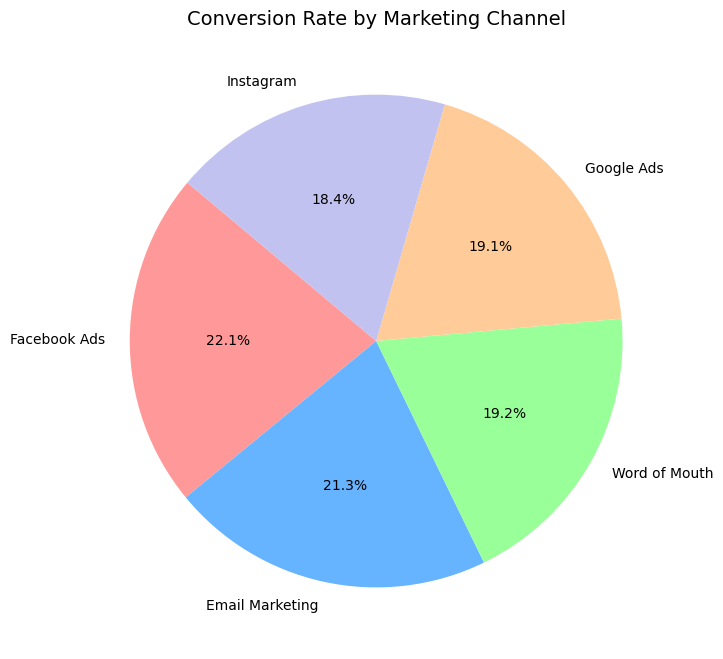

In [588]:
### Coversion rate by Marketting channel 
query7 = """
SELECT source, 
       COUNT(DISTINCT customer_id) AS total_customers, 
       COUNT(DISTINCT CASE WHEN order_frequency > 5 THEN customer_id END) AS converted_customers, 
       (COUNT(DISTINCT CASE WHEN order_frequency > 5 THEN customer_id END) * 1.0 / COUNT(DISTINCT customer_id)) AS conversion_rate
FROM customer_data
GROUP BY source
ORDER BY conversion_rate DESC;
"""
conv_rate = pd.read_sql(query7, connection)
print(conv_rate)

plt.figure(figsize=(8, 8))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']

# Use conv_rate instead of df
plt.pie(conv_rate['conversion_rate'], labels=conv_rate['source'], autopct='%1.1f%%', colors=colors, startangle=140)

plt.title('Conversion Rate by Marketing Channel', fontsize=14)
plt.show()

## Insights 
1. Facebook Ads Lead in Conversions (22.1%)-
    * Facebook Ads drive the highest conversion rate, meaning a larger proportion of customers acquired through this channel make repeat purchases.
    * This suggests that Facebook Ads are highly effective in targeting the right audience or encouraging purchases.
      
2. Email Marketing Performs Well (21.3%)-
    * Email Marketing is the second-best channel for conversion rates.
    * This indicates strong customer engagement and retention strategies, possibly through personalized offers or remarketing campaigns.

3. Word of Mouth (19.2%) & Google Ads (19.1%) Are Similar -
    * Word of Mouth and Google Ads have almost equal conversion rates.
    * While Google Ads bring in customers via paid marketing, Word of Mouth conversions indicate strong brand loyalty and organic growth.

4. Instagram Has the Lowest Conversion Rate (18.4%)-
    * Instagram lags slightly behind other channels.
    * This could mean that while Instagram helps in customer acquisition, it might not be as effective in converting customers into repeat buyers.
      
## Recommendations:
* Scale Facebook Ads & Email Marketing – Since they yield the highest conversion rates, increasing investments in these areas could maximize revenue.
* Optimize Instagram Strategy – Reassess content, engagement methods, and audience targeting to improve conversions.
* Leverage Word of Mouth – Encourage referrals, reviews, and loyalty programs to enhance organic growth.

### Channels With Most Engaged Customers

            source  total_customers_acquired  total_revenue  \
0  Email Marketing                       219      556655.12   
1     Facebook Ads                       219      554021.25   
2    Word of Mouth                       190      532801.24   
3        Instagram                       187      485037.28   
4       Google Ads                       185      472040.17   

   revenue_per_customer  
0           2541.804201  
1           2529.777397  
2           2804.217053  
3           2593.782246  
4           2551.568486  



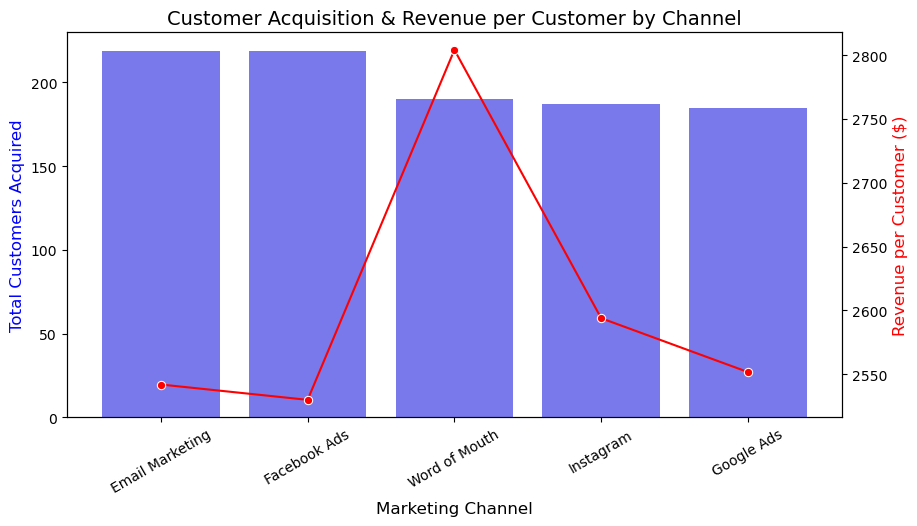

In [589]:
query9 = """
SELECT source, 
    COUNT(DISTINCT customer_id) AS total_customers_acquired,
    SUM(order_value) AS total_revenue,
    (SUM(order_value) / COUNT(DISTINCT customer_id)) AS revenue_per_customer
FROM customer_data
GROUP BY source
ORDER BY total_revenue DESC;
"""
coi = pd.read_sql(query9, connection)
print(coi)
print()

coi = coi.sort_values(by="total_revenue", ascending=False)

fig, ax1 = plt.subplots(figsize=(10, 5))

# Bar chart for total new customers
sns.barplot(x="source", y="total_customers_acquired", data=coi, color="blue", alpha=0.6, ax=ax1)
ax1.set_ylabel("Total Customers Acquired", fontsize=12, color="blue")

# Line chart for revenue per customer
ax2 = ax1.twinx()
sns.lineplot(x="source", y="revenue_per_customer", data=coi, marker="o", color="red", ax=ax2)
ax2.set_ylabel("Revenue per Customer ($)", fontsize=12, color="red")


ax1.set_xticks(range(len(coi["source"]))) 
ax1.set_xticklabels(coi["source"], rotation=30)  

# Titles and labels
plt.title("Customer Acquisition & Revenue per Customer by Channel", fontsize=14)
ax1.set_xlabel("Marketing Channel", fontsize=12)

plt.show()

## Insights
1. Customer Acquisition Trends (Blue Bars)-
    * Email Marketing and Facebook Ads are the top channels for acquiring new customers, bringing in the highest numbers.
    * Word of Mouth has a slightly lower customer acquisition count compared to digital channels like Instagram and Google Ads.
      
2. Revenue per Customer (Red Line)-
    * Word of Mouth customers generate the highest revenue per customer, significantly higher than other channels. This indicates that referrals or organic recommendations result in higher-value customers.
    * Email Marketing and Facebook Ads, despite acquiring more customers, have lower revenue per customer than Word of Mouth.
    * Google Ads and Instagram generate the lowest revenue per customer, which might indicate lower spending habits from customers acquired through these channels.
      
## Recomendations
* Word of Mouth is the most profitable channel per customer but does not acquire as many customers as digital ads. Scaling referral programs might be beneficial.
* Email Marketing and Facebook Ads are efficient in acquiring large volumes of customers but should be optimized for increasing per-customer revenue (e.g., upselling, personalized offers).
* Google Ads and Instagram have relatively lower customer revenue, so evaluating cost-effectiveness and conversion strategies is necessary.

## Customer Segment Response to Marketing

            source customer_type  avg_engagement
0       Google Ads     Returning       53.019737
1       Google Ads           New       51.484848
2        Instagram     Returning       51.128205
3  Email Marketing     Returning       50.914773
4        Instagram           New       50.709677
5    Word of Mouth     Returning       50.166667
6     Facebook Ads           New       49.139535
7    Word of Mouth           New       48.950000
8     Facebook Ads     Returning       48.528409
9  Email Marketing           New       47.232558


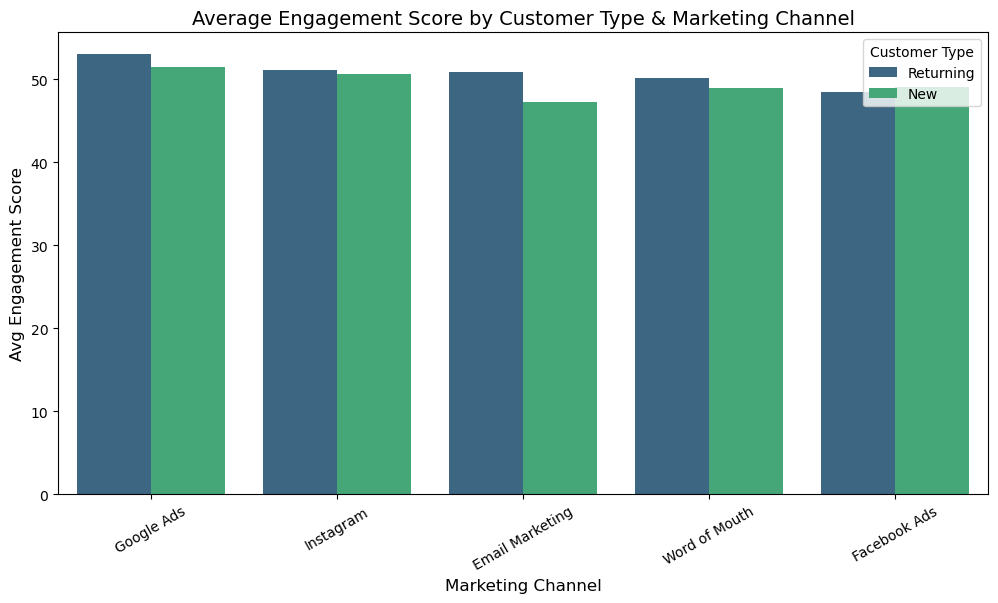

In [590]:
query10 = """
SELECT source, 
       customer_type, 
       AVG(engagement_score) AS avg_engagement
FROM customer_data
GROUP BY source, customer_type
ORDER BY avg_engagement DESC;
"""
seg = pd.read_sql(query10, connection)
print(seg)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=seg, x="source", y="avg_engagement", hue="customer_type", palette="viridis")

# Labels & Title
plt.xlabel("Marketing Channel", fontsize=12)
plt.ylabel("Avg Engagement Score", fontsize=12)
plt.title("Average Engagement Score by Customer Type & Marketing Channel", fontsize=14)
plt.xticks(rotation=30)

# Show Plot
plt.legend(title="Customer Type")
plt.show()

## Insights 
1. Returning Customers Have Higher Engagement Across All Channels- 
    * In every marketing channel, returning customers have slightly higher engagement scores compared to new customers.
    * This suggests that once a customer interacts with a brand, they tend to stay engaged over time.
2. Email Marketing & Google Ads Have the Highest Engagement-
    * Both new and returning customers show strong engagement in Google Ads and Email Marketing, making them valuable for customer retention.
    * These channels likely drive consistent interactions, making them effective for nurturing customer relationships.
3. New Customers Have the Lowest Engagement in Email Marketing & Facebook Ads
    * New customers show the lowest engagement in Email Marketing and Facebook Ads, indicating potential friction in these channels for first-time interactions.
    * Possible reasons:
        1. Emails might not be personalized or relevant for new users.
        2. Facebook Ads may not be effectively targeting highly engaged users.
4. Word of Mouth Shows Balanced Engagement
    * Unlike other channels, Word of Mouth maintains a small engagement gap between new and returning customers.
    * This indicates that referral-based customers tend to engage at a steady rate, whether they are new or returning.

## Business Recomendations-
1. Improve email onboarding sequences to increase engagement.
2. Adjust Facebook Ads to target more engaged demographics.
3. Leverage Google Ads & Email Marketing for Customer Retention:
4. Encourage referral programs to attract high-quality, engaged new customers.

# Return Analysis

#### Relationship between return, Discount and Product category

  product_category  total_returns  total_orders  avg_discount
0            Jeans             41           173     16.560694
1           Shirts             38           169     13.934911
2         T-Shirts             32           169     13.934911
3          Dresses             32           166     15.210843
4      Sweatshirts             31           148     12.466216
5          Jackets             30           175     15.857143


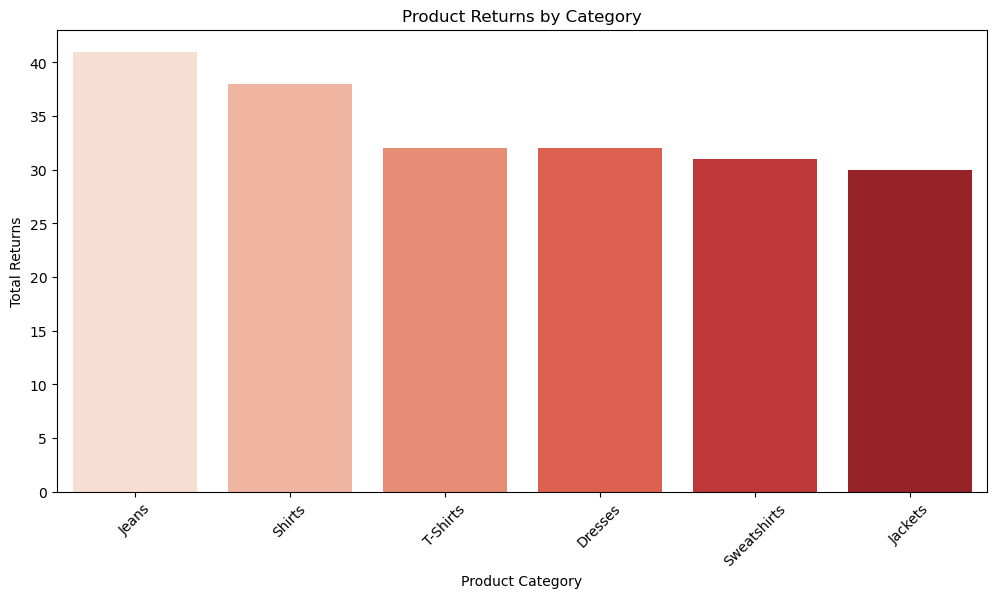

In [591]:
query11 = """
SELECT product_category, 
       SUM(CASE WHEN return_status = 'Yes' THEN 1 ELSE 0 END) AS total_returns, 
       COUNT(order_id) AS total_orders, 
       AVG(discount_applied) AS avg_discount
FROM customer_data
GROUP BY product_category
ORDER BY total_returns DESC;
"""
returns_df = pd.read_sql(query11, connection)
print(returns_df)

plt.figure(figsize=(12,6))
sns.barplot(x='product_category', y='total_returns', data=returns_df, hue='product_category',palette="Reds")
plt.xticks(rotation=45)
plt.title('Product Returns by Category')
plt.xlabel('Product Category')
plt.ylabel('Total Returns')
plt.show()

## Insights from Product Returns by Category
1. Jeans Have the Highest Return Rate
    * Jeans are often tricky in terms of fit and comfort, leading to frequent returns.
    * Customers may struggle with size variations across different brands.
2. Shirts Also Have High Returns
    * Possible reasons:
        - Fabric expectations not matching reality.
        - Fit issues (slim fit vs. regular fit).
        - Color variations between online images and actual products.
3. T-Shirts, Dresses, and Sweatshirts Have Moderate Returns - These categories are relatively easier to size but may still be returned due to quality concerns or incorrect orders.
4. Jackets Have the Lowest Returns - Customers likely make more informed purchases for jackets, considering factors like weather suitability and style preferences.



#### check wheather Discount playsa any role on Return Trend

   discount_applied  total_orders  total_returns  return_rate
0                50            48             13     0.270833
1                40            46             18     0.391304
2                30           100             21     0.210000
3                25            91             16     0.175824
4                20           103             22     0.213592
5                15           114             25     0.219298
6                10            88             16     0.181818
7                 5           111             16     0.144144
8                 0           299             57     0.190635


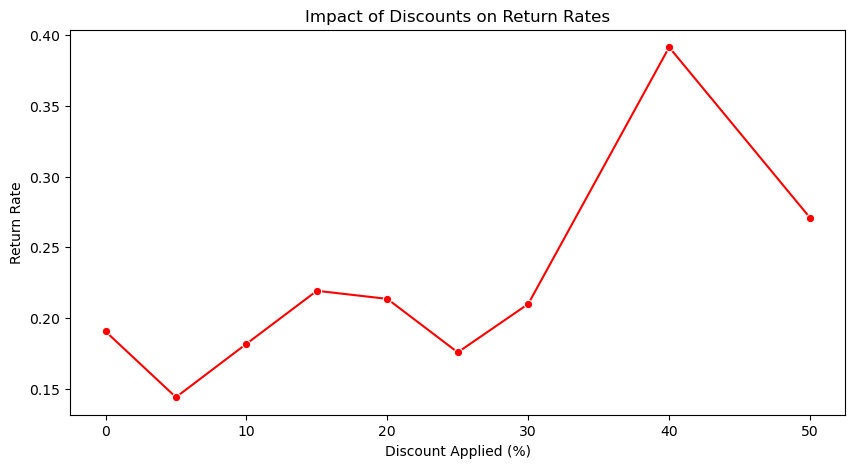

In [592]:
query13 = """
SELECT discount_applied, 
       COUNT(order_id) AS total_orders, 
       SUM(CASE WHEN return_status = 'Yes' THEN 1 ELSE 0 END) AS total_returns, 
       (SUM(CASE WHEN return_status = 'Yes' THEN 1 ELSE 0 END) * 1.0 / COUNT(order_id)) AS return_rate
FROM customer_data
GROUP BY discount_applied
ORDER BY discount_applied DESC;
"""
discount_returns = pd.read_sql(query13, connection)
print(discount_returns)

plt.figure(figsize=(10,5))
sns.lineplot(x='discount_applied', y='return_rate', data=discount_returns, marker='o', color='red')
plt.title('Impact of Discounts on Return Rates')
plt.xlabel('Discount Applied (%)')
plt.ylabel('Return Rate')
plt.show()

## Insights 
1. Higher Discounts Lead to Higher Return Rates
    * The return rate increases significantly as discounts rise, peaking at around 40% discount.
    * Customers might be buying impulsively due to the discount, leading to more returns.
2. Return Rate is Lowest Around 5% Discount -  When the discount is minimal, customers are more intentional with their purchases, reducing returns.
3. A Sharp Spike at 40% Discount
    * At this discount level, return rates reach their highest point (~40%).
    * This suggests that deep discounts attract customers who may be less committed to keeping the product.
4. Slight Decline Beyond 40% Discount
    * After 40%, the return rate starts dropping, possibly because only highly motivated buyers take advantage of extreme discounts.

## Recommendations to Reduce Returns from Discounts
* Encourage Store Credit Instead of Refunds – Offer exchange or store credit instead of direct refunds.
* Limit Deep Discounts on High-Return Products – Identify products that are frequently returned and adjust discounts accordingly.
* Improve Product Descriptions & Sizing Guides – Ensure that customers have accurate information to make informed purchases.
* Highlight "Final Sale" for Steep Discounts – Make it clear that certain discounted items are non-returnable.

#### Analysing whether payment methods have any implication on return

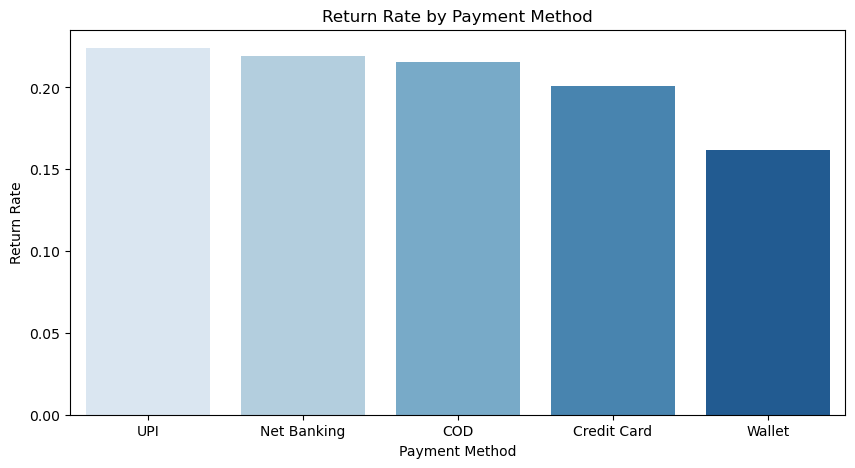

In [593]:
query14 = """
SELECT payment_method, 
       COUNT(order_id) AS total_orders,
       SUM(CASE WHEN return_status = 'Yes' THEN 1 ELSE 0 END) AS total_returns,
       (SUM(CASE WHEN return_status = 'Yes' THEN 1 ELSE 0 END) * 1.0 / COUNT(order_id)) AS return_rate
FROM customer_data
GROUP BY payment_method
ORDER BY return_rate DESC;
"""
payment_returns = pd.read_sql(query14, connection)

# Bar plot
plt.figure(figsize=(10,5))
sns.barplot(x='payment_method', y='return_rate', data=payment_returns,hue='payment_method', palette="Blues")
plt.title('Return Rate by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Return Rate')
plt.show()

## Insights on Return Rate by Payment Method
1. UPI and Net Banking Have the Highest Return Rates (~21%)
    * Customers using these payment methods may be more likely to make impulsive purchases.
    * UPI is often used for quick transactions, which might contribute to rushed buying decisions.
2. Cash on Delivery (COD) Also Has a High Return Rate (~21%)
    * COD orders might have a higher return rate because customers can refuse delivery if they change their minds.
    * Fraudulent orders or impulse purchases may be more common in COD transactions.
3. Credit Card Payments Show a Lower Return Rate (~19%)
    * Customers using credit cards tend to be more deliberate with their purchases, leading to fewer returns.
    * Credit card users may also be more loyal and familiar with the brand.
4. Wallet Payments Have the Lowest Return Rate (~16%)
    * Digital wallet users may be repeat customers or more tech-savvy shoppers who make informed decisions.
    * Wallet balances are often preloaded, making customers more conscious of their spending.

## Recommendations to Reduce Return Rates Based on Payment Method
- Require Partial Payment for COD Orders – This can reduce fake or impulse orders.
- Enhance Product Descriptions for UPI & Net Banking Users – Provide detailed product information to prevent uninformed purchases.
- Incentivize Wallet & Credit Card Payments – Offer small discounts or loyalty points to encourage payments with lower return rate.
- Use AI-Based Fraud Detection for COD & High-Return Customers – Identify frequent returners and implement targeted solutions.

#### Analyse Relationship between Payment Method and Product Category Return

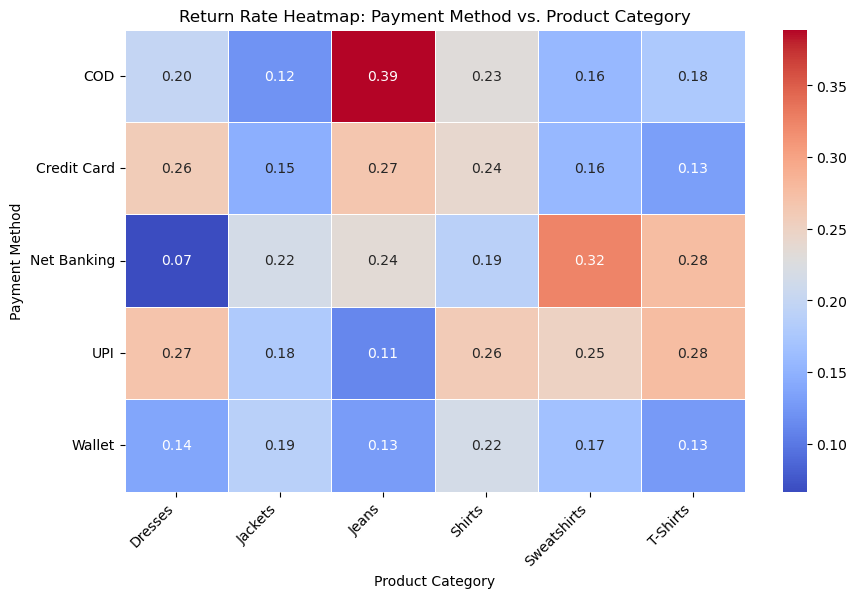

In [594]:

query = """
SELECT 
    payment_method,
    product_category,
    SUM(CASE WHEN return_status = 'Yes' THEN 1 ELSE 0 END) * 1.0 / COUNT(order_id) AS return_rate
FROM customer_data
GROUP BY payment_method, product_category
ORDER BY payment_method, return_rate DESC;
"""

# Read data from database
df_1 = pd.read_sql(query, connection)
# Fix pivot syntax
heatmap_data = df_1.pivot(index="payment_method", columns="product_category", values="return_rate")

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Return Rate Heatmap: Payment Method vs. Product Category")
plt.xlabel("Product Category")
plt.ylabel("Payment Method")

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

## Insights 
1. High Return Rate for COD & Jeans
      * Jeans purchased via COD have the highest return rate (0.39 or 39%).
      * This could indicate size issues, quality concerns, or misuse of the COD option (customers ordering multiple sizes and returning what doesn't fit).
      * Sweatshirts & T-Shirts Show High Returns with Net Banking & UPI

2. Sweatshirts have a high return rate for Net Banking (0.32 or 32%) and UPI (0.25 or 25%).
      * T-Shirts also have high returns with Net Banking (0.28) and UPI (0.28).
      * Possible reasons: quality dissatisfaction or incorrect size selection.

3. Dresses Have Lower Returns for Net Banking
      * Dresses have a very low return rate for Net Banking (0.07 or 7%), indicating customers using this payment method may be more confident in their purchases.
4. Wallet Payments Show Relatively Lower Return Rates
      * Across all product categories, wallet payments have lower return rates compared to other methods.
      * Customers using digital wallets might be more decisive and confident about their purchases, reducing returns.


## Analysing The Relationship Between Customer tenure And Return

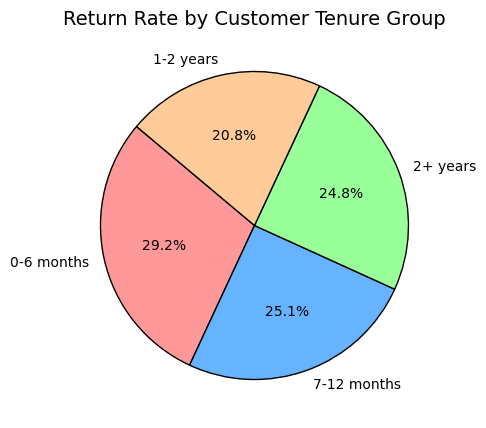

In [595]:
query15 = """
SELECT 
    CASE 
        WHEN customer_tenure <= 6 THEN '0-6 months'
        WHEN customer_tenure BETWEEN 7 AND 12 THEN '7-12 months'
        WHEN customer_tenure BETWEEN 13 AND 24 THEN '1-2 years'
        ELSE '2+ years'
    END AS tenure_group,
    COUNT(order_id) AS total_orders,
    SUM(CASE WHEN return_status = 'Yes' THEN 1 ELSE 0 END) AS total_returns,
    (SUM(CASE WHEN return_status = 'Yes' THEN 1 ELSE 0 END) * 1.0 / COUNT(order_id)) AS return_rate
FROM customer_data
GROUP BY tenure_group
ORDER BY return_rate DESC;
"""
tenure_returns = pd.read_sql(query15, connection)


# Define labels and values
labels = tenure_returns["tenure_group"]
sizes = tenure_returns["return_rate"]

# Define colors
colors = ["#ff9999", "#66b3ff", "#99ff99", "#ffcc99"]

# Create pie chart
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors, startangle=140, wedgeprops={'edgecolor': 'black'})

# Add title
plt.title("Return Rate by Customer Tenure Group", fontsize=14)

# Show plot
plt.show()

## Insights
1. New Customers (0-6 Months) Have the Highest Return Rate (29.2%) -
    * Customers in their first 6 months return products the most.
    * Possible reasons:
        - Unfamiliarity with product quality & sizing
        - Impulse purchases & buyer’s remorse
        - Higher likelihood of first-time discount-driven purchases
      
2. Return Rates Decrease Over Time
    * 7-12 months (25.1%) and 2+ years (24.8%) show lower return rates than the 0-6 month group.
    * Customers who continue shopping are likely more confident in their purchases.
    * They may have found their correct sizes or trusted brands within the store.

3. Lowest Return Rate Among 1-2 Year Customers (20.8%)
    * This group seems most stable with their purchases.
    * They might have settled into preferred product categories & sizes.
    * However, return rates slightly increase again for 2+ years customers (24.8%), possibly due to more frequent shopping.


## Analysing whether the Returns have any impact due to Product Size 

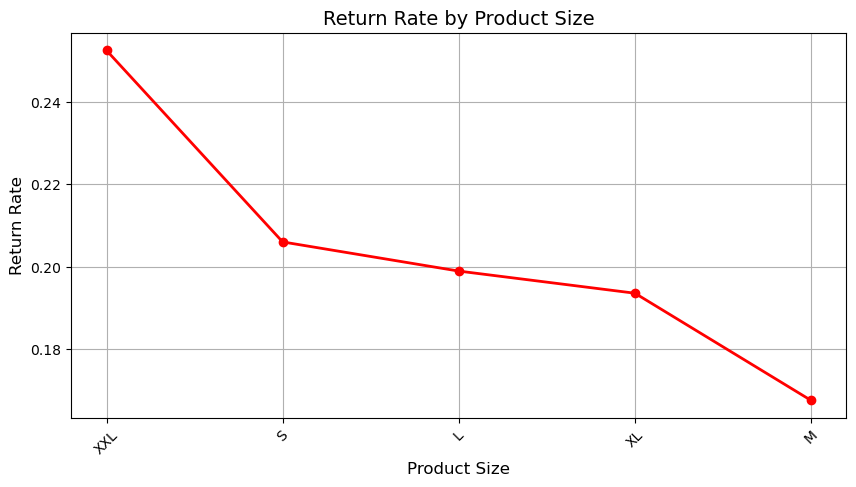

In [596]:
query16 = """
SELECT 
    size, 
    COUNT(order_id) AS total_orders,
    SUM(CASE WHEN return_status = 'Yes' THEN 1 ELSE 0 END) AS total_returns,
    (SUM(CASE WHEN return_status = 'Yes' THEN 1 ELSE 0 END) * 1.0 / COUNT(order_id)) AS return_rate
FROM customer_data
GROUP BY size
ORDER BY return_rate DESC;
"""
size_returns = pd.read_sql(query16, connection)

# Line plot
plt.figure(figsize=(10, 5))
plt.plot(size_returns["size"], size_returns["return_rate"], marker='o', linestyle='-', color='red', linewidth=2)

# Labels and title
plt.title("Return Rate by Product Size", fontsize=14)
plt.xlabel("Product Size", fontsize=12)
plt.ylabel("Return Rate", fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)

# Show the plot
plt.show()

## Insights from Return Rate by Product Size Chart
1. XXL Has the Highest Return Rate (~25%)
    * Customers buying XXL sizes are returning items the most.
    * Possible reasons:
        - Limited availability of proper fits—XXL sizes may not be true to standard sizing.
        - Inconsistent measurements across brands.
        - Customers may buy multiple sizes and return the ones that don’t fit.
          
2. Smaller Sizes (S) Also Show Higher Return Rates (~20%)
    * Similar reasons as XXL: fit issues, brand sizing inconsistencies.
    * Petite customers may struggle to find well-fitted items, leading to more returns.
    * Return Rates Decrease for Medium (M), Large (L), and Extra Large (XL)

3. M has the lowest return rate (~17%), indicating better fit satisfaction.
    * These sizes are often more standardized and commonly produced, leading to fewer issues.


## Analysing Customer type and Return Rate

  customer_type  total_orders  total_returns  return_rate
0           New           190             43     0.226316
1     Returning           810            161     0.198765


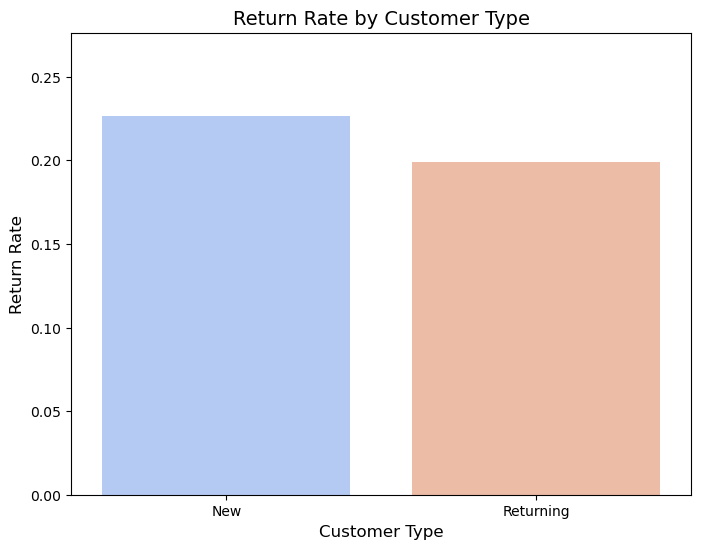

In [597]:
query17 = """
SELECT 
    customer_type,
    COUNT(order_id) AS total_orders,
    SUM(CASE WHEN return_status = 'Yes' THEN 1 ELSE 0 END) AS total_returns,
    (SUM(CASE WHEN return_status = 'Yes' THEN 1 ELSE 0 END) * 1.0 / COUNT(order_id)) AS return_rate
FROM customer_data
GROUP BY customer_type
ORDER BY return_rate DESC;
"""
cust_ret = pd.read_sql(query17, connection)
print(cust_ret)

#visualize
plt.figure(figsize=(8,6))
sns.barplot(x=cust_ret["customer_type"], y=cust_ret["return_rate"], hue=cust_ret["customer_type"], palette="coolwarm")

# Customize the plot
plt.xlabel("Customer Type", fontsize=12)
plt.ylabel("Return Rate", fontsize=12)
plt.title("Return Rate by Customer Type", fontsize=14)
plt.ylim(0, cust_ret["return_rate"].max() + 0.05)  # Adjust y-axis limit
plt.xticks(rotation=0)  # Keep labels horizontal

# Show the plot
plt.show()

## Insights
1. New Customers Have a Higher Return Rate (~22%) -
    * First-time buyers are more likely to return products compared to returning customers.
    * This may be due to unmet expectations, sizing issues, or a lack of familiarity with the brand.
2. Returning Customers Have a Lower Return Rate (~20%)
    * These customers have prior experience with the products, reducing the likelihood of returns.
    * They might have a better understanding of product quality, sizing, and expectations.


#### Relationship Between Location And Return Rate

  customer_location  total_orders  total_returns  return_rate
0              Pune           136             36     0.264706
1         Bangalore           132             28     0.212121
2           Kolkata           133             28     0.210526
3           Chennai           120             25     0.208333
4            Mumbai           129             25     0.193798
5         Hyderabad           107             20     0.186916
6             Delhi           131             23     0.175573
7            Jaipur           112             19     0.169643


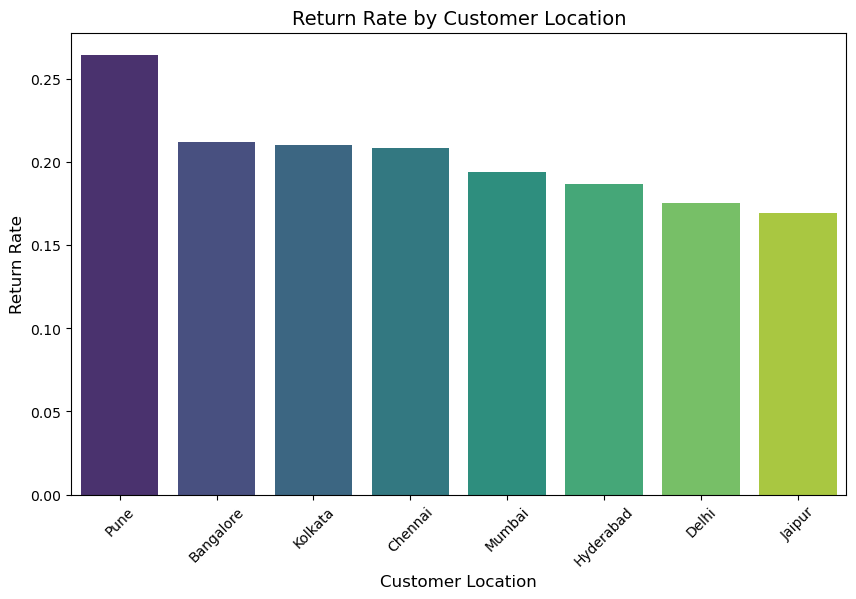

In [598]:
query18 = """
SELECT 
    customer_location,
    COUNT(order_id) AS total_orders,
    SUM(CASE WHEN return_status = 'Yes' THEN 1 ELSE 0 END) AS total_returns,
    (SUM(CASE WHEN return_status = 'Yes' THEN 1 ELSE 0 END) * 1.0 / COUNT(order_id)) AS return_rate
FROM customer_data
GROUP BY customer_location
ORDER BY return_rate DESC;
"""
cust_loc = pd.read_sql(query18, connection)
print(cust_loc)
plt.figure(figsize=(10,6))
sns.barplot(x=cust_loc["customer_location"], y=cust_loc["return_rate"], hue=cust_loc["customer_location"],palette="viridis")
# Labels and Titles
plt.xlabel("Customer Location", fontsize=12)
plt.ylabel("Return Rate", fontsize=12)
plt.title("Return Rate by Customer Location", fontsize=14)
plt.xticks(rotation=45)

# Show the plot
plt.show()

## Insights 
1. Pune Has the Highest Return Rate (~26%)
    * Customers in Pune are returning orders at a significantly higher rate than other locations.
    * Possible reasons: product quality issues, misleading descriptions, or customer expectations not being met.
2. Bangalore, Kolkata, and Chennai Have Similar Return Rates (~20%)
    * These locations also show relatively high return rates.
    * There could be regional preferences that are not being considered in marketing and product descriptions.
3.Jaipur Has the Lowest Return Rate (~15%)
    * This suggests that customers in Jaipur are more satisfied with their purchases or that the product selection aligns better with their needs.


# Possible Reasons Of Return
1.  Sizing & Fit Issues 
    * Inconsistent sizing across brands leads to high returns (e.g., XXL and S sizes had higher return rates).
    * Customers buy multiple sizes and return the ones that don’t fit.
    * Lack of accurate size charts or fitting guidance.
    * Petite and plus-size customers may struggle to find well-fitting products.
    * **Affected Groups:**
   - Product Sizes: XXL, S
   - Categories: Apparel (Jeans, Shirts, Dresses)

2. Discounts & Purchase Behavior 
    * Higher discount rates increase return rates, especially at 40-50% off.
    * Customers may engage in impulse buying during sales but return items after reconsideration.
    * Lower perceived quality for heavily discounted items.
    * Possibility of customers abusing return policies by ordering just to try.
    * **Affected Groups:** - Higher return rates observed at 40%+ discounts
  
3. Product-Specific Issues 
    * Quality issues or unmet expectations for certain product categories (e.g., Jeans had the highest returns).
    * Items may not match online descriptions or images, leading to dissatisfaction.
    * Fabric/material discomfort or durability concerns.
    * **Affected Groups:**
      - Product Categories: Jeans, Shirts, Dresses
      - Inventory Issues: Mislabeled or defective products
      - ]
4. Payment & Customer Behavior 
    * Cash on Delivery (COD) had the highest return rate—possibly due to:
      - Customers rejecting orders at the doorstep.
      - Fake or non-serious orders.
    * Digital payments (Wallets, Credit Cards) had lower return rates, suggesting more committed buyers.
    * New customers (0-6 months tenure) had the highest return rate, likely due to:
      - Trial purchases with uncertainty about fit/quality.
      - Lack of brand trust leading to more cautious buying.
    * Affected Groups:
      - Payment Methods: COD, UPI
      - Customer Tenure: 0-6 months
        
## Possible Actions to Reduce Returns
* Improve size guides & virtual try-ons for clothing.
* Stricter return policies for high-discount purchases (e.g., no free returns on 50%+ discounts).
* Enhance product descriptions & images to align with reality.
* Encourage prepaid orders with incentives (e.g., discounts for digital payments).
* Personalized recommendations for new customers to improve purchase confidence.

# Inventory Insights And Optimization

#### Product at a risk of stock out

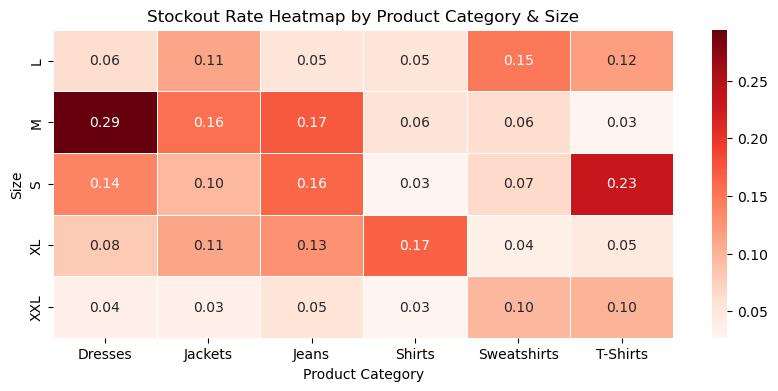

In [599]:
query19 = """
SELECT  
    product_category,
    size,
    COUNT(order_id) AS total_orders,
    SUM(CASE WHEN inventory_status = 'In Stock' THEN 1 ELSE 0 END) AS available_inventory,
    SUM(CASE WHEN inventory_status = 'Out of Stock' THEN 1 ELSE 0 END) AS stockout_count,
    (SUM(CASE WHEN inventory_status = 'Out of Stock' THEN 1 ELSE 0 END) * 1.0 / COUNT(order_id)) AS stockout_rate
FROM customer_data
GROUP BY product_category, size
HAVING available_inventory = 0 OR available_inventory < total_orders
ORDER BY stockout_rate DESC;
"""
risk_stock = pd.read_sql(query19, connection)
# Pivot the data for heatmap format
heatmap_data = risk_stock.pivot(index="size", columns="product_category", values="stockout_rate")

# Create the heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(heatmap_data, annot=True, cmap="Reds", linewidths=0.5, fmt=".2f")

# Labels and title
plt.title("Stockout Rate Heatmap by Product Category & Size")
plt.xlabel("Product Category")
plt.ylabel("Size")

# Show the plot
plt.show()

## Insight
1. High Stockout Risk (Dark Red Areas)
    * Dresses (Size M) → 29% stockout rate
    * T-Shirts (Size S) → 23% stockout rate
    * Jeans (Size M) → 17% stockout rate
    * Shirts (Size XL) → 17% stockout rate
These products and sizes are experiencing the highest inventory risks and might require urgent restocking or better demand forecasting.

2. Moderate Stockout Risk (Orange Areas)
    * Jackets (Size M & S) → 16% stockout rate
    * Sweatshirts (Size L) → 15% stockout rate
    * Dresses (Size S) → 14% stockout rate
These categories are at risk but not as critical as the ones above. Inventory management adjustments can help reduce potential shortages.

3. Low Stockout Risk (Light Areas)
    * XXL Sizes in most categories have the lowest stockout rates, indicating a possible surplus or lower demand.
    * Shirts (Size M, L) & Sweatshirts (Size XXL) → 3% stockout rate
These items are well-stocked and may not require immediate attention.
## Recommendations
* Optimize Restocking: Prioritize restocking Dresses (M), T-Shirts (S), and Jeans (M) as they have the highest demand-supply gap.
* Size-based Inventory Balancing: M and S sizes are most at risk, indicating a higher demand for these sizes. The stock allocation strategy should reflect this.
* Analyze Overstocks: XXL sizes seem to have lower stockout rates, possibly leading to overstock issues. This should be monitored to prevent excess inventory holding costs.
* Predictive Modeling: Use a time-series forecasting model to predict future demand and improve inventory planning.

In [600]:

# Aggregate stockout risk per product
# Count total orders per product
# Calculate total orders per product category
product_demand = df.groupby("product_category")["order_id"].count().reset_index()
product_demand.rename(columns={"order_id": "total_orders"}, inplace=True)

# Count stockout days per product category (avoiding duplicate counts)
stockout_days = df[df["inventory_status"] == "Out of Stock"].groupby("product_category")["order_date"].nunique().reset_index()
stockout_days.rename(columns={"order_date": "days_out_of_stock"}, inplace=True)

# Merge the two dataframes on product_category
stockout_risk = product_demand.merge(stockout_days, on="product_category", how="left")
stockout_risk["days_out_of_stock"] = stockout_risk["days_out_of_stock"].fillna(0)  # Fill missing values

# Calculate stockout rate as (days out of stock / total days in dataset)
total_days = df["order_date"].nunique()
stockout_risk["stockout_rate"] = (stockout_risk["days_out_of_stock"] / total_days) * 100

# Filter high-risk product categories (above average stockout rate)
avg_stockout_rate = stockout_risk["stockout_rate"].mean()
high_risk_categories = stockout_risk[stockout_risk["stockout_rate"] > avg_stockout_rate]

# Display results
print(high_risk_categories)


  product_category  total_orders  days_out_of_stock  stockout_rate
0          Dresses           166                 21       5.753425
1          Jackets           175                 17       4.657534
2            Jeans           173                 20       5.479452
5         T-Shirts           169                 19       5.205479


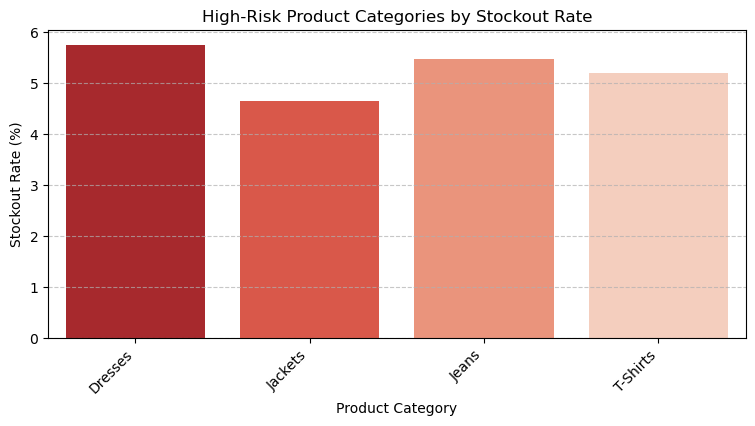

In [601]:
plt.figure(figsize=(9, 4))
sns.barplot(data=high_risk_categories, x="product_category", y="stockout_rate", hue="product_category", palette="Reds_r")

# Add labels and title
plt.xticks(rotation=45, ha="right")
plt.xlabel("Product Category")
plt.ylabel("Stockout Rate (%)")
plt.title("High-Risk Product Categories by Stockout Rate")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

## Insights
1. Dresses Have the Highest Stockout Rate (~6%)
    * Dresses are at the highest risk of stockouts, indicating strong demand or supply chain issues.
    * Possible reasons: seasonal demand, low inventory levels, or production delays.
2. Jeans and T-Shirts Also Have High Stockout Rates (~5-5.5%)
    * These categories are also at risk of running out frequently.
    * Potentially, their popularity, insufficient stock replenishment, or unexpected demand spikes could be contributing factors.
3. Jackets Have a Slightly Lower Stockout Rate (~4.5%)
    * While still a high-risk category, jackets seem to have slightly better inventory control compared to dresses.
    * This could be due to seasonal sales patterns or better demand forecasting.
## Recommendations
* Improve demand forecasting: Use historical sales trends to anticipate demand better.
* Increase safety stock for high-risk categories: Especially for dresses, jeans, and T-shirts.
* Optimize supply chain efficiency: Work with suppliers to reduce lead times.
* Analyze regional stockout trends: Certain locations may drive higher demand, requiring regional adjustments.

In [602]:
df.to_csv("clean_data.csv", index=False)